In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("diabetes_data_upload.csv")  # dosya adını kendine göre değiştir
# Yes/No gibi string ifadeleri sayısala çeviriyoruz
df = df.replace({'Yes': 1, 'No': 0})
df = df.replace({'Male': 1, 'Female': 0})
df = df.replace({'Positive': 1, 'Negative': 0})
df.head()


<ipython-input-3-345c5fb18927>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})
<ipython-input-3-345c5fb18927>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Male': 1, 'Female': 0})
<ipython-input-3-345c5fb18927>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
X = df.drop("class", axis=1)   # class = hedef sütun
y = df["class"]                # hedef değişken


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=6)

In [ ]:
y_pred = knn.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[30  3]
 [ 8 63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.95      0.89      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.90      0.88       104
weighted avg       0.90      0.89      0.90       104



In [ ]:
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    acc = model.score(X_test_scaled, y_test)
    print(f"k = {k} | Accuracy = {acc:.4f}")


k = 1 | Accuracy = 0.9615
k = 2 | Accuracy = 0.9135
k = 3 | Accuracy = 0.9038
k = 4 | Accuracy = 0.9038
k = 5 | Accuracy = 0.8942
k = 6 | Accuracy = 0.8942
k = 7 | Accuracy = 0.8942
k = 8 | Accuracy = 0.8750
k = 9 | Accuracy = 0.8846
k = 10 | Accuracy = 0.8654
k = 11 | Accuracy = 0.8750
k = 12 | Accuracy = 0.8654
k = 13 | Accuracy = 0.8846
k = 14 | Accuracy = 0.8750
k = 15 | Accuracy = 0.8750
k = 16 | Accuracy = 0.8654
k = 17 | Accuracy = 0.8654
k = 18 | Accuracy = 0.8462
k = 19 | Accuracy = 0.8654
k = 20 | Accuracy = 0.8558


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# Ölçekleme + KNN pipeline
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))

# 5 katlı çapraz doğrulama
cv_scores = cross_val_score(knn_pipeline, X, y, cv=5, scoring='accuracy')

print("Çapraz doğrulama skorları:", cv_scores)
print("Ortalama doğruluk (accuracy): %.2f%%" % (cv_scores.mean() * 100))


Çapraz doğrulama skorları: [0.92307692 0.92307692 0.88461538 0.98076923 0.98076923]
Ortalama doğruluk (accuracy): 93.85%


In [ ]:
y_pred = knn.predict(X_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[30  3]
 [ 8 63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.95      0.89      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.90      0.88       104
weighted avg       0.90      0.89      0.90       104



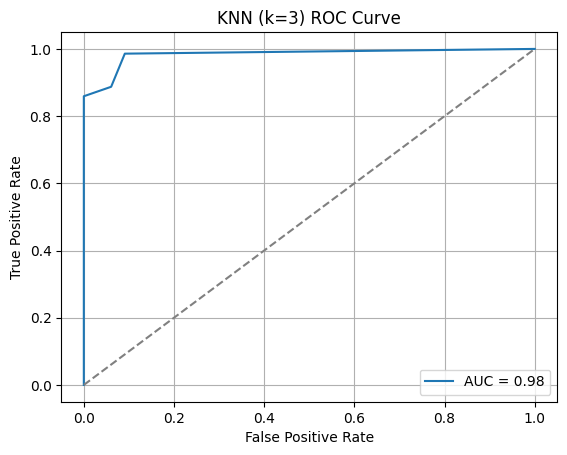

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# KNN için k=6 modeliyle tahmin olasılıkları alınır
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
knn.fit(X_train, y_train)
y_probs = knn.predict_proba(X_test)[:, 1]  # Sınıf 1 için olasılıklar

# ROC eğrisi çizimi
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("KNN (k=3) ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pickle

# Eğitilmiş modeli bir dosyaya kaydet (örnek isim: diabetes_model.pkl)
with open("diabetes_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model başarıyla 'diabetes_model.pkl' olarak kaydedildi.")


Model başarıyla 'diabetes_model.pkl' olarak kaydedildi.


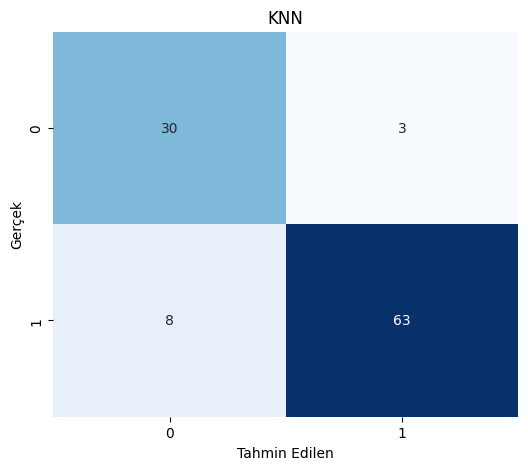

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix oluştur
cm = confusion_matrix(y_test, y_pred)

# Heatmap çizelim
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('KNN')
plt.show()
